# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [61]:
# if plotnine is not installed in Jupter then use the following command to install it 
!conda install -c conda-forge --yes plotnine

Solving environment: ...working... done

# All requested packages already installed.



In [62]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Running this project require the following imports 

In [63]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

%matplotlib inline

In [163]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



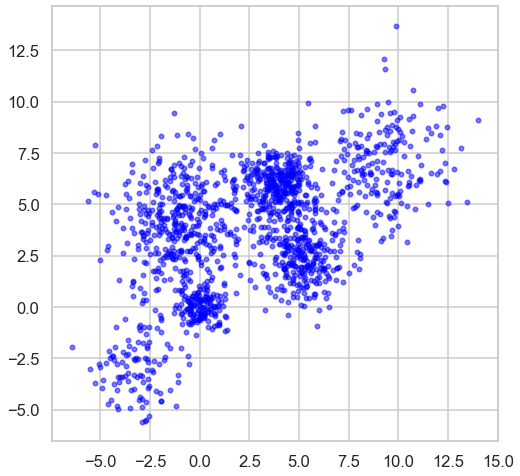

In [65]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [199]:
array = np.array(Multi_blob_Data)
dataframe = pd.DataFrame(array)
np.array(Multi_blob_Data)
pd.DataFrame(array)

,0,1
0,-2.354272,-3.179744
1,-2.158005,-1.020061
2,-3.304399,-3.304378
3,-0.947023,-2.002335
4,-3.610317,-2.294672
...,...,...
1445,9.240137,3.378037
1446,10.305952,7.366174
1447,9.864057,13.674604
1448,5.457008,9.931984


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

# Kmeans to cluster the data 

In [165]:
clustering = KMeans(n_clusters=4, init="k-means++", random_state=42)
clustering.fit(array)
y_kmeans = clustering.predict(array)

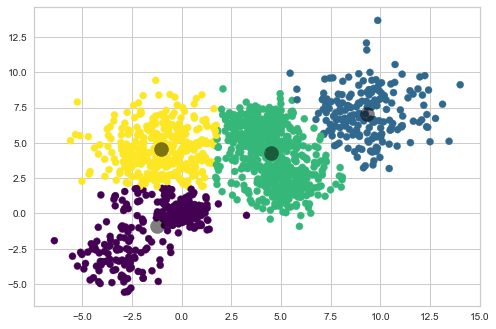

In [166]:
plt.scatter(array[:, 0], array[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = clustering.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# The elbow method

In [167]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(array)
    kmeanModel.fit(array)
  
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_
    

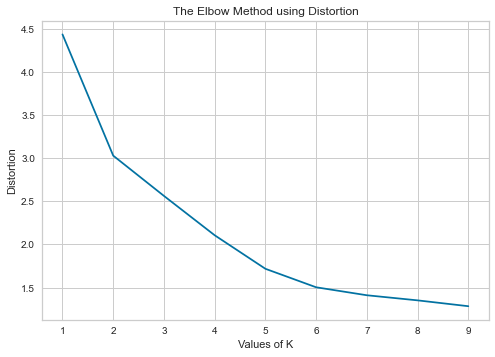

In [168]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# The silhouette method

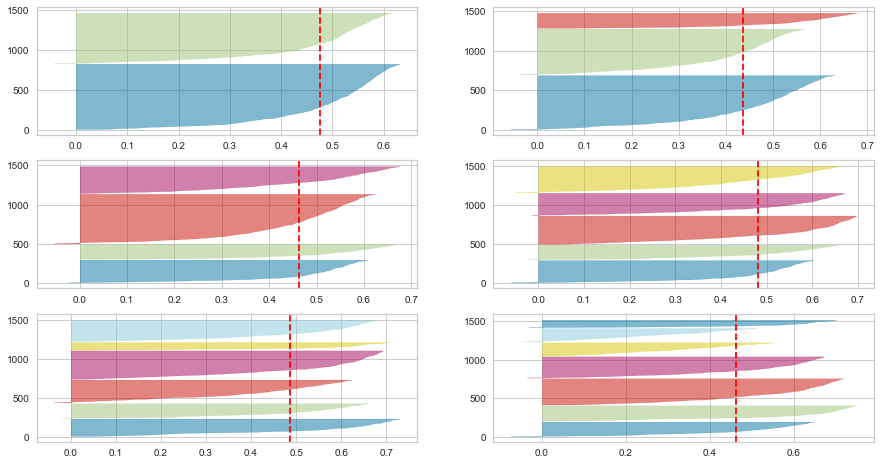

In [169]:
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(array)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

# Agglomerative Clustering to cluster above data

In [297]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [303]:
# Only var to be edited is distance threshold (How to choose distance thresh?):
## N.B Choosing a low distance thrsh value would result in abnormal number of clusters i.e. 300+ (Dependent on data)

clustering_model = AgglomerativeClustering(n_clusters=None, affinity ='euclidean', linkage = 'average', distance_threshold = 2.0).fit(dataframe)
labels = clustering_model1.labels_

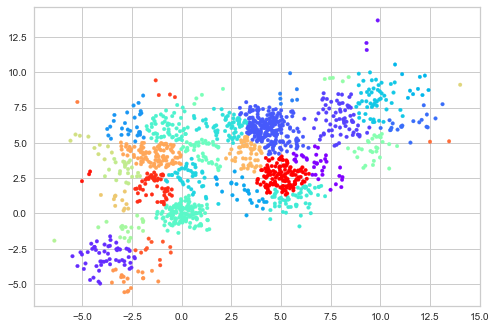

In [304]:
 # Visualizing the clustering    
plt.scatter(dataframe[0], dataframe[1], c = clustering_model.fit_predict(dataframe), cmap ='rainbow',s =13)
plt.show()

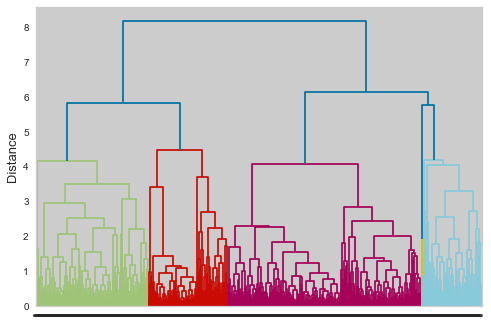

In [305]:
#visualizing the dendogram
clusters = linkage(dataframe, method='average')
dendrogram(clusters, labels=labels)
plt.ylabel('Distance', fontsize=13)
plt.show()

In [324]:
clustering_model1 = AgglomerativeClustering(n_clusters=None, affinity ='euclidean', linkage = 'single', distance_threshold = 2.0).fit(dataframe)
labels1 = clustering_model1.labels_

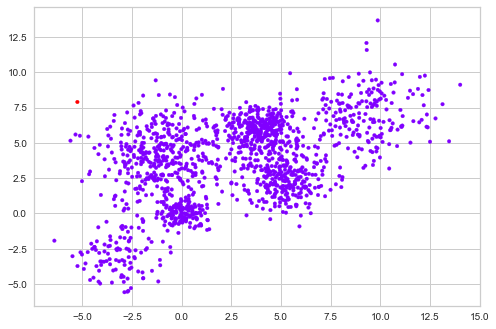

In [327]:
 # Visualizing the clustering    
plt.scatter(dataframe[0], dataframe[1], c = clustering_model1.fit_predict(dataframe), cmap ='rainbow',s =13)
plt.show()

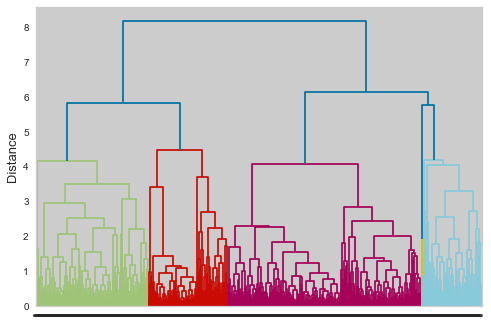

In [329]:
#visualizing the dendogram
clusters = linkage(dataframe, method='average')
dendrogram(clusters, labels=labels1)
plt.ylabel('Distance', fontsize=13)
plt.show()

In [332]:
clustering_model2 = AgglomerativeClustering(n_clusters=None, affinity ='manhattan', linkage = 'single', distance_threshold = 2.0).fit(dataframe)
labels2 = clustering_model2.labels_

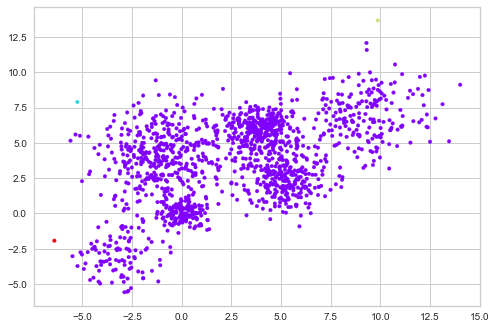

In [333]:
 # Visualizing the clustering    
plt.scatter(dataframe[0], dataframe[1], c = clustering_model2.fit_predict(dataframe), cmap ='rainbow',s =13)
plt.show()

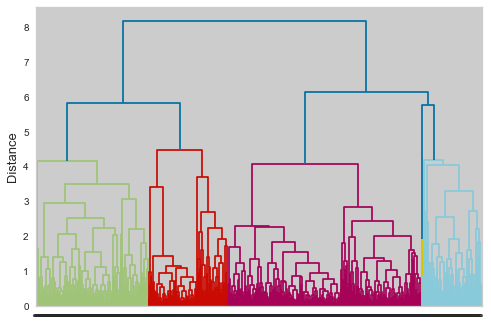

In [334]:
#visualizing the dendogram
clusters = linkage(dataframe, method='average')
dendrogram(clusters, labels=labels2)
plt.ylabel('Distance', fontsize=13)
plt.show()

In [309]:
clustering_model3 = AgglomerativeClustering(n_clusters=None, affinity ='manhattan', linkage = 'average', distance_threshold = 2.0).fit(dataframe)
labels3 = clustering_model3.labels_

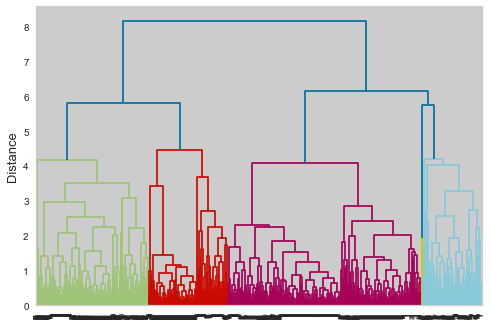

In [354]:
#visualizing the dendogram
clusters = linkage(dataframe , method='average')
dendrogram(clusters, labels=labels3)
plt.ylabel('Distance', fontsize=13)
plt.show()

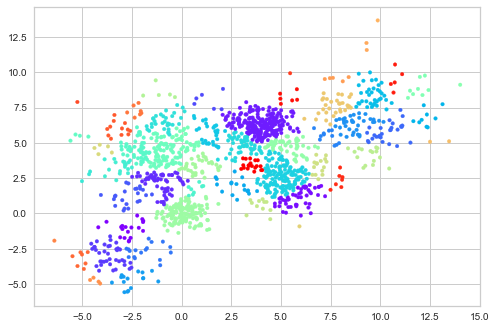

In [283]:
 # Visualizing the clustering    
plt.scatter(dataframe[0], dataframe[1], c = clustering_model3.fit_predict(dataframe), cmap ='rainbow',s =13)
plt.show()

In [335]:
clustering_model4 = AgglomerativeClustering(n_clusters=None, affinity ='cosine', linkage = 'single', distance_threshold = 2.0).fit(dataframe)
labels4 = clustering_model4.labels_

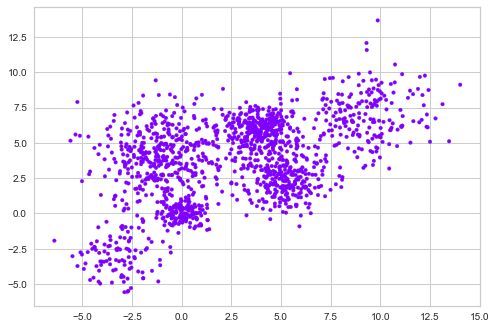

In [336]:
 # Visualizing the clustering    
plt.scatter(dataframe[0], dataframe[1], c = clustering_model4.fit_predict(dataframe), cmap ='rainbow',s =13)
plt.show()

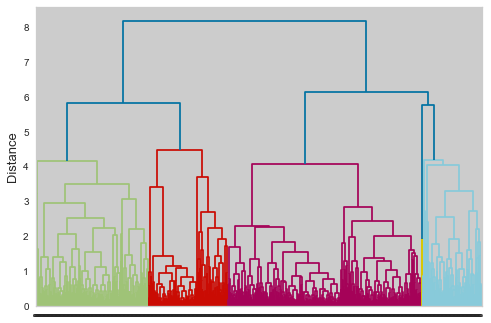

In [337]:
#visualizing the dendogram
clusters = linkage(dataframe, method='average')
dendrogram(clusters, labels=labels4)
plt.ylabel('Distance', fontsize=13)
plt.show()

In [339]:
clustering_model5 = AgglomerativeClustering(n_clusters=None, affinity ='cosine', linkage = 'average', distance_threshold = 2.0).fit(dataframe)
labels5 = clustering_model5.labels_

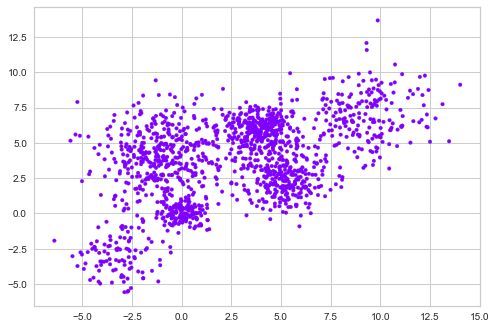

In [340]:
 # Visualizing the clustering    
plt.scatter(dataframe[0], dataframe[1], c = clustering_model5.fit_predict(dataframe), cmap ='rainbow',s =13)
plt.show()

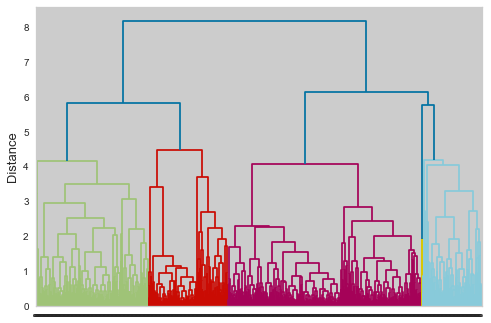

In [341]:
#visualizing the dendogram
clusters = linkage(dataframe, method='average')
dendrogram(clusters, labels=labels5)
plt.ylabel('Distance', fontsize=13)
plt.show()

In [359]:
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(dataframe, clustering_model.fit_predict(dataframe)))
silhouette_scores.append(
		silhouette_score(dataframe, clustering_model1.fit_predict(dataframe)))
silhouette_scores.append(
		silhouette_score(dataframe, clustering_model2.fit_predict(dataframe)))
silhouette_scores.append(
		silhouette_score(dataframe, clustering_model3.fit_predict(dataframe)))
silhouette_scores


[0.3155710172095083,
 0.3218066204847175,
 0.14871638406533946,
 0.2781468651903617]

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [344]:
from sklearn.cluster import DBSCAN



In [345]:
epsilons = np.linspace(0.1, 3, num=30)
epsilons

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ])

In [346]:
min_samples = np.arange(5, 26, step=1)
min_samples

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25])

In [347]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.1, 5),
 (0.1, 6),
 (0.1, 7),
 (0.1, 8),
 (0.1, 9),
 (0.1, 10),
 (0.1, 11),
 (0.1, 12),
 (0.1, 13),
 (0.1, 14),
 (0.1, 15),
 (0.1, 16),
 (0.1, 17),
 (0.1, 18),
 (0.1, 19),
 (0.1, 20),
 (0.1, 21),
 (0.1, 22),
 (0.1, 23),
 (0.1, 24),
 (0.1, 25),
 (0.2, 5),
 (0.2, 6),
 (0.2, 7),
 (0.2, 8),
 (0.2, 9),
 (0.2, 10),
 (0.2, 11),
 (0.2, 12),
 (0.2, 13),
 (0.2, 14),
 (0.2, 15),
 (0.2, 16),
 (0.2, 17),
 (0.2, 18),
 (0.2, 19),
 (0.2, 20),
 (0.2, 21),
 (0.2, 22),
 (0.2, 23),
 (0.2, 24),
 (0.2, 25),
 (0.3, 5),
 (0.3, 6),
 (0.3, 7),
 (0.3, 8),
 (0.3, 9),
 (0.3, 10),
 (0.3, 11),
 (0.3, 12),
 (0.3, 13),
 (0.3, 14),
 (0.3, 15),
 (0.3, 16),
 (0.3, 17),
 (0.3, 18),
 (0.3, 19),
 (0.3, 20),
 (0.3, 21),
 (0.3, 22),
 (0.3, 23),
 (0.3, 24),
 (0.3, 25),
 (0.4, 5),
 (0.4, 6),
 (0.4, 7),
 (0.4, 8),
 (0.4, 9),
 (0.4, 10),
 (0.4, 11),
 (0.4, 12),
 (0.4, 13),
 (0.4, 14),
 (0.4, 15),
 (0.4, 16),
 (0.4, 17),
 (0.4, 18),
 (0.4, 19),
 (0.4, 20),
 (0.4, 21),
 (0.4, 22),
 (0.4, 23),
 (0.4, 24),
 (0.4, 25),
 (0.5, 5),
 

In [348]:
from sklearn.metrics import silhouette_score as ss


In [349]:
N = len(combinations)
N

630

In [350]:
def get_scores_and_labels(combinations, data):
    scores = []
    all_labels_list = []
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(dataframe)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
    
        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
        continue
    
    scores.append(ss(dataframe, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, dataframe)

Combination (0.1, 7) on iteration 3 of 630 has 0 clusters. Moving on
Combination (0.1, 8) on iteration 4 of 630 has 0 clusters. Moving on
Combination (0.1, 9) on iteration 5 of 630 has 0 clusters. Moving on
Combination (0.1, 10) on iteration 6 of 630 has 0 clusters. Moving on
Combination (0.1, 11) on iteration 7 of 630 has 0 clusters. Moving on
Combination (0.1, 12) on iteration 8 of 630 has 0 clusters. Moving on
Combination (0.1, 13) on iteration 9 of 630 has 0 clusters. Moving on
Combination (0.1, 14) on iteration 10 of 630 has 0 clusters. Moving on
Combination (0.1, 15) on iteration 11 of 630 has 0 clusters. Moving on
Combination (0.1, 16) on iteration 12 of 630 has 0 clusters. Moving on
Combination (0.1, 17) on iteration 13 of 630 has 0 clusters. Moving on
Combination (0.1, 18) on iteration 14 of 630 has 0 clusters. Moving on
Combination (0.1, 19) on iteration 15 of 630 has 0 clusters. Moving on
Combination (0.1, 20) on iteration 16 of 630 has 0 clusters. Moving on
Combination (0.1

In [351]:
best_dict

{'best_epsilon': 2.1999999999999997,
 'best_min_samples': 19,
 'best_labels': array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64),
 'best_score': 0.4685207355522043}

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [352]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 